## Importing necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Analysing Data

In [8]:
df=pd.read_csv("./Mall_Customers.csv")

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Cleaning

#### Checking for missing/null values

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Checking for duplicated values

In [13]:
df["CustomerID"].duplicated().sum()

0

#### Keeping only necessary features : we don't need customer id column for KMeans CLustering

In [14]:
df=df.drop("CustomerID",axis=1)

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Checking for any outlier : outlier can't exist on Gender column since it is classification column

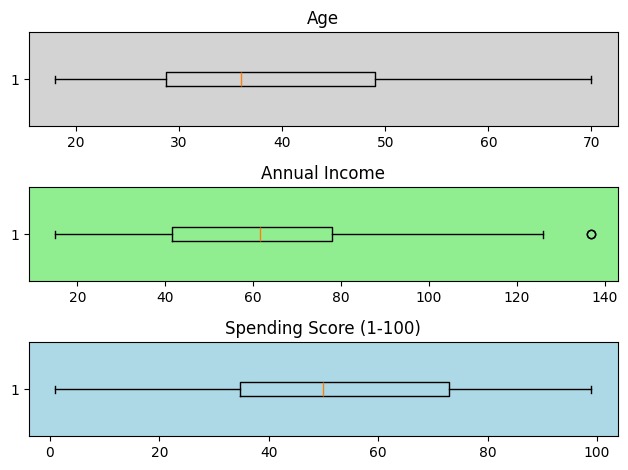

In [16]:
plt.subplot(3,1,1,facecolor="lightgrey")
plt.boxplot(df['Age'], vert=False)
plt.title("Age")

plt.subplot(3,1,2,facecolor="lightgreen")
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income")

plt.subplot(3,1,3,facecolor="lightblue")
plt.boxplot(df['Spending Score (1-100)'], vert=False)
plt.title("Spending Score (1-100)")

plt.tight_layout()
plt.show()

##### oulier exist in Annual income so we need to remove it 

In [17]:
# calculate summary statistics 
mean = df["Annual Income (k$)"].mean() 
std  = df["Annual Income (k$)"].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

print("Annual Income")
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df = df[(df["Annual Income (k$)"] >= lower_bound) & (df["Annual Income (k$)"] <= upper_bound)]

Annual Income
Lower Bound : 8.030557669457515
Upper Bound : 113.08944233054248


Text(0.5, 1.0, 'Annual Income')

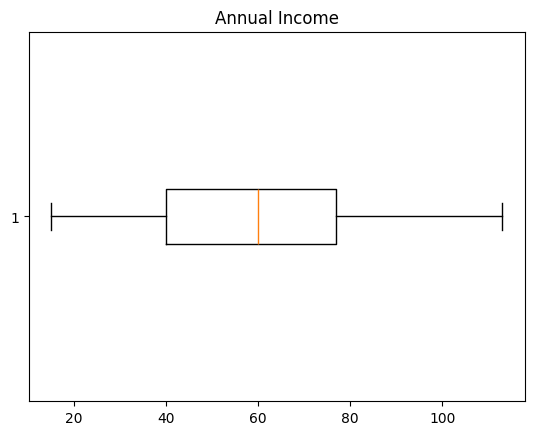

In [18]:
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income")

In [19]:
df.shape

(194, 4)

#### Now Our Dataset is ready for applying ML Model : KMeans Clustering

## Applying ML model : KMeans Clustering

In [20]:
from sklearn.cluster import KMeans

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### here before proceeding with the dataset we need to convert Gender column into integer form : Male - 1 & Female - 0

In [22]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Determining K value

In [24]:
X=df.iloc[:,:]

In [25]:
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [26]:
wcss

[275244.6288659794,
 183967.60235191637,
 131927.7242673587,
 92927.45112433862,
 63977.297129681916,
 47102.70317650186,
 43554.94850297789,
 40388.807803894,
 38176.55064935065,
 35384.93864416236,
 32335.27724216959,
 30173.972333084428,
 29911.413266363266,
 26398.566700184347,
 23923.504618453444,
 23169.49362304362,
 23150.455042351867,
 23965.892124542122,
 18042.889194139192,
 18038.097963147964]

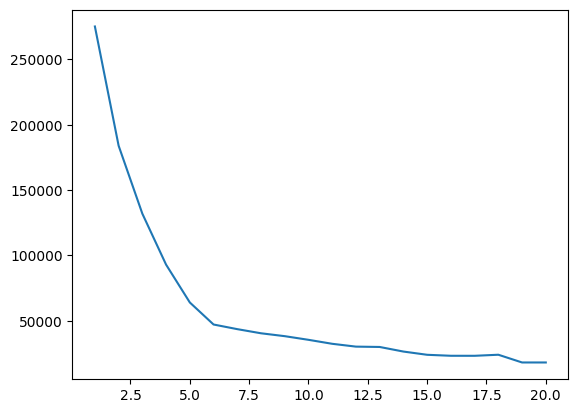

In [27]:
plt.plot(range(1,21),wcss)

#### we can see from the plot that there could be 6 cluster so K value = 6

In [28]:
km=KMeans(n_clusters=6)

In [29]:
km.fit(X)

KMeans(n_clusters=6)

In [30]:
Y_pred=km.predict(X)

In [31]:
Y_pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 1, 2,
       1, 4, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2,
       5, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 5, 2,
       2, 5, 5, 2, 5, 2, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0])

In [32]:
X[Y_pred==3].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
126,1,43,71,35
128,1,59,71,11
130,1,47,71,9
134,1,20,73,5
136,0,44,73,7


##### these are those datapoints which belong to cluster 3

##### Here We can't visualise datapoints in thier respective cluster since it is 4d data so to viualise we need to perform dimensionality reduction ie, converting 4d data to 2d/3d data via PCA or LDA